In [1]:
using Plots

In [3]:
type Star
    id::Int
    m::Float64
    x::Array{Float64}
    xdot::Array{Float64}
    xddot::Array{Float64}
end

In [4]:
function calc_acceleration!(stars)
    for star in stars
        star.xddot = zeros(Int, length(star.xddot))
        for star2 in stars
            if star.id != star2.id
                star.xddot += G*star2.m/(+)(((star.x - star2.x).^2)...)^(3/2)*(star2.x - star.x)
            end
        end
    end
end

calc_acceleration! (generic function with 1 method)

In [5]:
function move!(stars, dt)
    for star in stars
        star.x += star.xdot * dt
        star.xdot += star.xddot * dt
    end
end

move! (generic function with 1 method)

In [6]:
function step!(stars, dt, steps)
    logs = Array(Float64, steps, length(stars), length(stars[1].x))
    for i in 1:steps
        calc_acceleration!(stars)
        move!(stars, dt)
        for j in 1:length(stars)
            logs[i, j, :] = stars[j].x
        end
    end
    return logs
end

step! (generic function with 1 method)

In [179]:
G = 5

5

In [189]:
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0])

Star(1,10.0,[20.0,0.0],[0.0,5.0],[0.0,0.0])

In [190]:
star2 = Star(2, 100, [0, 0], [0, -0.5], [0, 0])

Star(2,100.0,[0.0,0.0],[0.0,-0.5],[0.0,0.0])

In [191]:
stars = [star1, star2]

2-element Array{Star,1}:
 Star(1,10.0,[20.0,0.0],[0.0,5.0],[0.0,0.0]) 
 Star(2,100.0,[0.0,0.0],[0.0,-0.5],[0.0,0.0])

In [192]:
calc_acceleration!(stars)

In [193]:
move!(stars, 0.1)

In [212]:
logs = step!(stars, 0.01, 3000)

3000×2×2 Array{Float64,3}:
[:, :, 1] =
 -10.668   3.0668 
 -10.6318  3.06318
 -10.5956  3.05956
 -10.5593  3.05593
 -10.523   3.0523 
 -10.4867  3.04867
 -10.4503  3.04503
 -10.4139  3.04139
 -10.3775  3.03775
 -10.341   3.0341 
 -10.3045  3.03045
 -10.2679  3.02679
 -10.2314  3.02314
   ⋮              
 -24.3311  4.43311
 -24.3237  4.43237
 -24.3162  4.43162
 -24.3086  4.43086
 -24.301   4.4301 
 -24.2933  4.42933
 -24.2856  4.42856
 -24.2778  4.42778
 -24.27    4.427  
 -24.2621  4.42621
 -24.2541  4.42541
 -24.2461  4.42461

[:, :, 2] =
 -21.2283   2.12283 
 -21.2451   2.12451 
 -21.2618   2.12618 
 -21.2784   2.12784 
 -21.295    2.1295  
 -21.3115   2.13115 
 -21.328    2.1328  
 -21.3444   2.13444 
 -21.3608   2.13608 
 -21.3771   2.13771 
 -21.3933   2.13933 
 -21.4095   2.14095 
 -21.4256   2.14256 
   ⋮                
  -4.90615  0.490615
  -4.94252  0.494252
  -4.97887  0.497887
  -5.01522  0.501522
  -5.05155  0.505155
  -5.08787  0.508787
  -5.12418  0.512418
  -5.16048  0

In [213]:
stars

2-element Array{Star,1}:
 Star(1,10.0,[-24.2461,-5.30557],[0.807163,-3.62428],[0.572462,0.115697])      
 Star(2,100.0,[4.42461,0.530557],[-0.0807163,0.362428],[-0.0572462,-0.0115697])


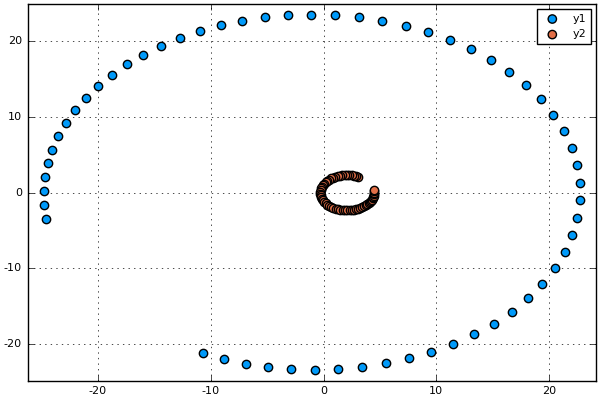

In [214]:
scatter(logs[:, 1, 1][1:50:end], logs[:, 1, 2][1:50:end])
scatter!(logs[:, 2, 1][1:50:end], logs[:, 2, 2][1:50:end])


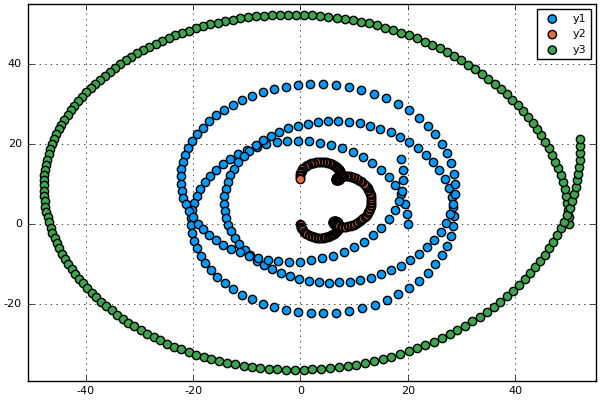

In [222]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0])
star2 = Star(2, 100, [0, 0], [0, -0.7], [0, 0])
star3 = Star(3, 10, [50, 0], [0, 3.5], [0, 0])
stars = [star1, star2, star3]
logs = step!(stars, 0.01, 10000)
scatter(logs[:, 1, 1][1:50:end], logs[:, 1, 2][1:50:end])
scatter!(logs[:, 2, 1][1:50:end], logs[:, 2, 2][1:50:end])
scatter!(logs[:, 3, 1][1:50:end], logs[:, 3, 2][1:50:end])


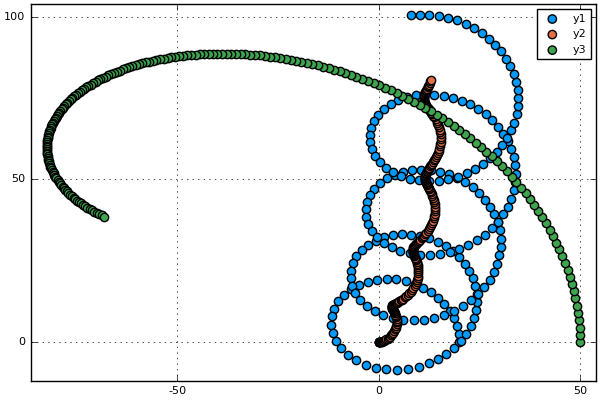

In [227]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0])
star2 = Star(2, 100, [0, 0], [0, 0], [0, 0])
star3 = Star(3, 10, [50, 0], [0, 4.5], [0, 0])
stars = [star1, star2, star3]
logs = step!(stars, 0.01, 10000)
scatter(logs[:, 1, 1][1:50:end], logs[:, 1, 2][1:50:end])
scatter!(logs[:, 2, 1][1:50:end], logs[:, 2, 2][1:50:end])
scatter!(logs[:, 3, 1][1:50:end], logs[:, 3, 2][1:50:end])


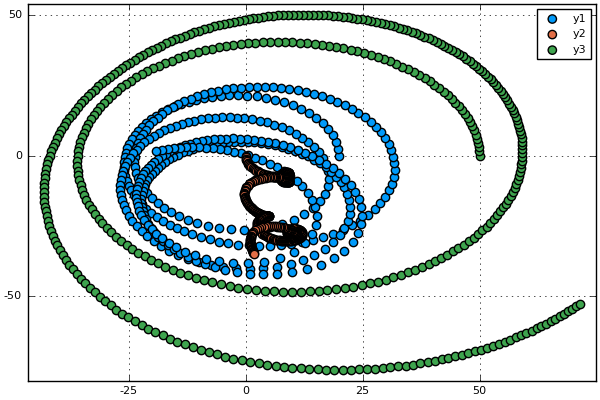

In [232]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0])
star2 = Star(2, 100, [0, 0], [0, -1], [0, 0])
star3 = Star(3, 10, [50, 0], [0, 3], [0, 0])
stars = [star1, star2, star3]
logs = step!(stars, 0.01, 20000)
scatter(logs[:, 1, 1][1:50:end], logs[:, 1, 2][1:50:end])
scatter!(logs[:, 2, 1][1:50:end], logs[:, 2, 2][1:50:end])
scatter!(logs[:, 3, 1][1:50:end], logs[:, 3, 2][1:50:end])


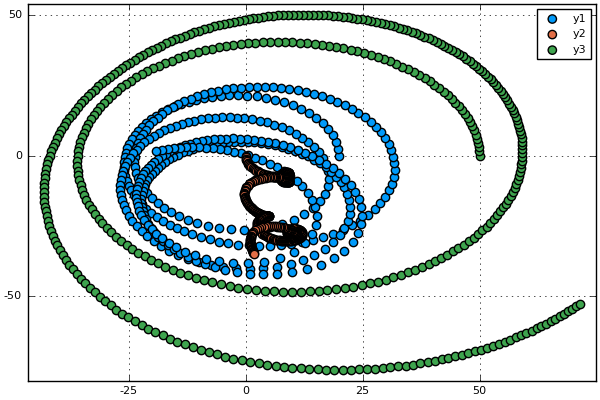

In [237]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0])
star2 = Star(2, 100, [0, 0], [0, -1], [0, 0])
star3 = Star(3, 10, [50, 0], [0, 3], [0, 0])
stars = [star1, star2, star3]
logs = step!(stars, 0.01, 20000)
scatter(logs[:, 1, 1][1:50:end], logs[:, 1, 2][1:50:end])
scatter!(logs[:, 2, 1][1:50:end], logs[:, 2, 2][1:50:end])
scatter!(logs[:, 3, 1][1:50:end], logs[:, 3, 2][1:50:end])


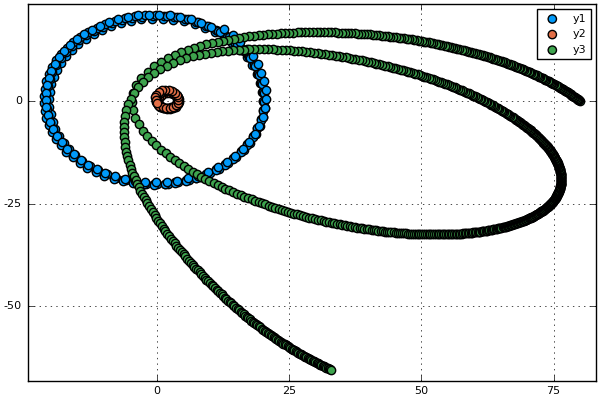

In [107]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0])
star2 = Star(2, 100, [0, 0], [0, -0.5], [0, 0])
star3 = Star(3, 0.5, [80, 0], [-1, 1], [0, 0])
stars = [star1, star2, star3]
logs = step!(stars, 0.003, 40000)
scatter(logs[:, 1, 1][2:150:end], logs[:, 1, 2][2:150:end])
scatter!(logs[:, 2, 1][2:500:end], logs[:, 2, 2][2:500:end])
scatter!(logs[:, 3, 1][2:50:end], logs[:, 3, 2][2:50:end])


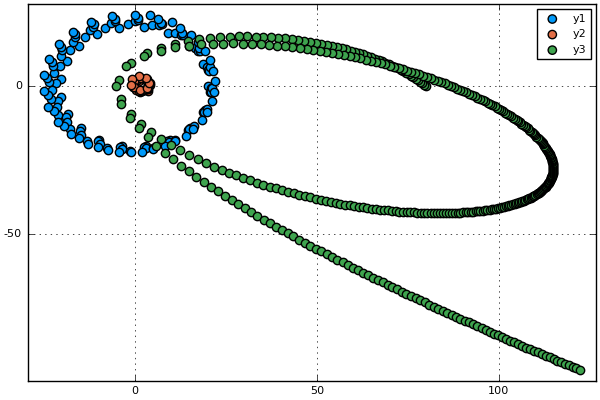

In [108]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0])
star2 = Star(2, 100, [0, 0], [0, -0.5], [0, 0])
star3 = Star(3, 0.5, [80, 0], [-1, 1], [0, 0])
stars = [star1, star2, star3]
logs = step!(stars, 0.01, 20000)
scatter(logs[:, 1, 1][2:150:end], logs[:, 1, 2][2:150:end])
scatter!(logs[:, 2, 1][2:500:end], logs[:, 2, 2][2:500:end])
scatter!(logs[:, 3, 1][2:50:end], logs[:, 3, 2][2:50:end])


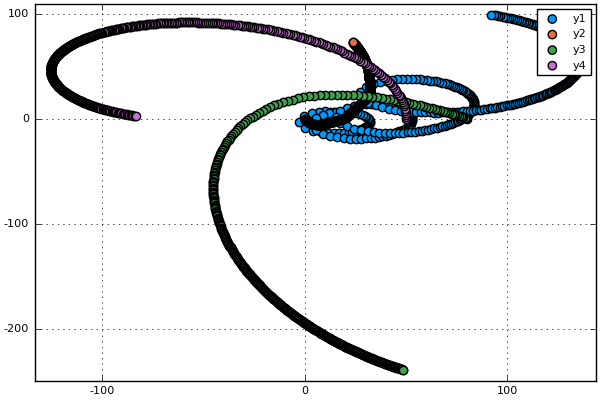

In [25]:
G = 5
star1 = Star(1, 3, [20, 0], [0, 2.5], [0, 0])
star2 = Star(2, 100, [0, 0], [0, -0.5], [0, 0])
star3 = Star(3, 0.5, [80, 0], [-1, 1], [0, 0])
star4 = Star(4, 20, [50, 0], [0, 4], [0, 0])
stars = [star1, star2, star3, star4]
logs = step!(stars, 0.01, 20000)
scatter(logs[:, 1, 1][2:50:end], logs[:, 1, 2][2:50:end])
scatter!(logs[:, 2, 1][2:50:end], logs[:, 2, 2][2:50:end])
scatter!(logs[:, 3, 1][2:50:end], logs[:, 3, 2][2:50:end])
scatter!(logs[:, 4, 1][2:50:end], logs[:, 4, 2][2:50:end])


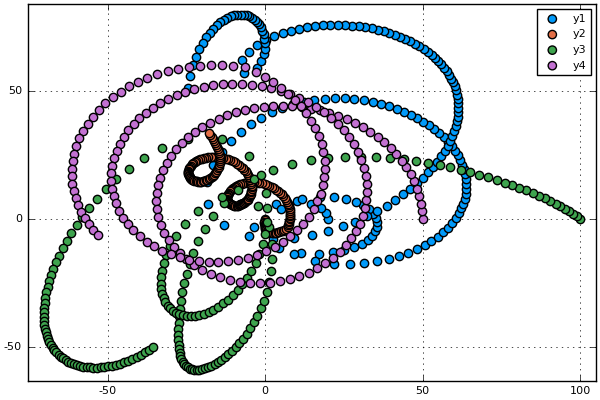

In [39]:
G = 5
star1 = Star(1, 3, [20, 0], [0, 2.3], [0, 0])
star2 = Star(2, 100, [0, 0], [-0.2, -0.5], [0, 0])
star3 = Star(3, 0.1, [100, 0], [-1, 1], [0, 0])
star4 = Star(4, 20, [50, 0], [0, 3], [0, 0])
stars = [star1, star2, star3, star4]
logs = step!(stars, 0.01, 20000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


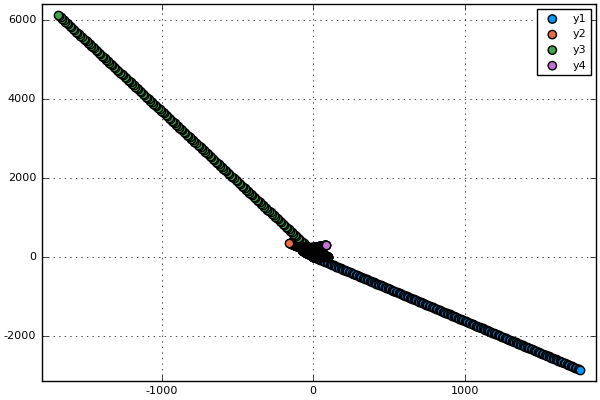

In [41]:
G = 5
star1 = Star(1, 3, [20, 0], [0, 2.3], [0, 0])
star2 = Star(2, 100, [0, 0], [-0.5, 1], [0, 0])
star3 = Star(3, 0.1, [100, 0], [-1, 1], [0, 0])
star4 = Star(4, 20, [50, 0], [0, 3], [0, 0])
stars = [star1, star2, star3, star4]
logs = step!(stars, 0.01, 20000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


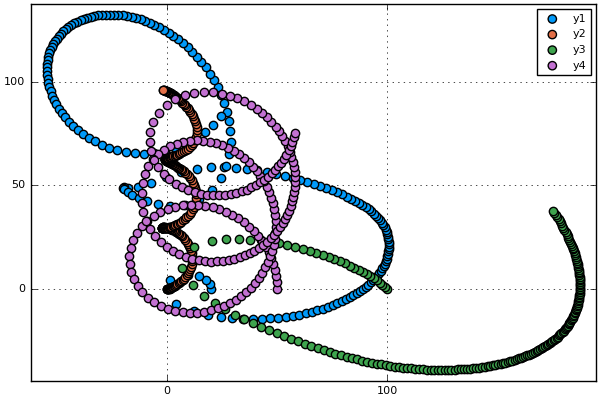

In [50]:
G = 5
star1 = Star(1, 3, [20, 0], [0, 2.3], [0, 0])
star2 = Star(2, 100, [0, 0], [0, -0.1], [0, 0])
star3 = Star(3, 0.1, [100, 0], [-1, 1], [0, 0])
star4 = Star(4, 20, [50, 0], [0, 3], [0, 0])
stars = [star1, star2, star3, star4]
logs = step!(stars, 0.01, 20000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


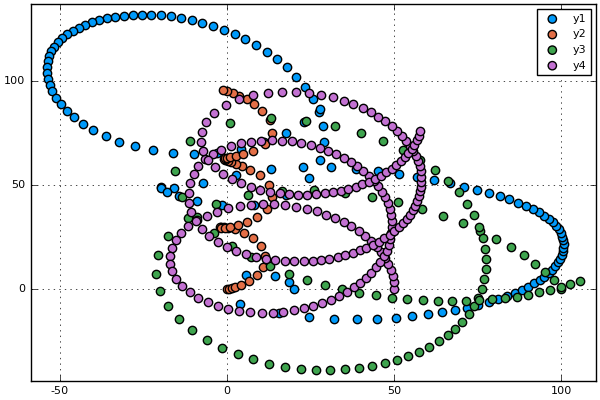

In [56]:
G = 5
star1 = Star(1, 3, [20, 0], [0, 2.3], [0, 0])
star2 = Star(2, 100, [0, 0], [0, -0.1], [0, 0])
star3 = Star(3, 0.1, [100, 0], [-1, 2], [0, 0])
star4 = Star(4, 20, [50, 0], [0, 3], [0, 0])
stars = [star1, star2, star3, star4]
logs = step!(stars, 0.01, 20000)
scatter(logs[:, 1, 1][2:150:end], logs[:, 1, 2][2:150:end])
scatter!(logs[:, 2, 1][2:400:end], logs[:, 2, 2][2:400:end])
scatter!(logs[:, 3, 1][2:200:end], logs[:, 3, 2][2:200:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


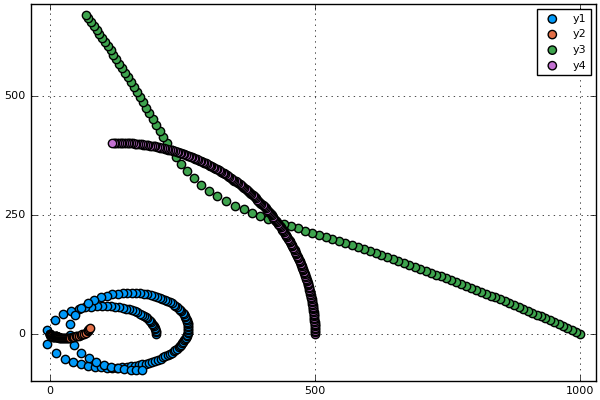

In [62]:
G = 50
star1 = Star(1, 3, [200, 0], [0, 2], [0, 0])
star2 = Star(2, 100, [0, 0], [0, -0.2], [0, 0])
star3 = Star(3, 0.1, [1000, 0], [-4, 2], [0, 0])
star4 = Star(4, 20, [500, 0], [0, 3], [0, 0])
stars = [star1, star2, star3, star4]
logs = step!(stars, 0.01, 20000)
scatter(logs[:, 1, 1][2:150:end], logs[:, 1, 2][2:150:end])
scatter!(logs[:, 2, 1][2:400:end], logs[:, 2, 2][2:400:end])
scatter!(logs[:, 3, 1][2:200:end], logs[:, 3, 2][2:200:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


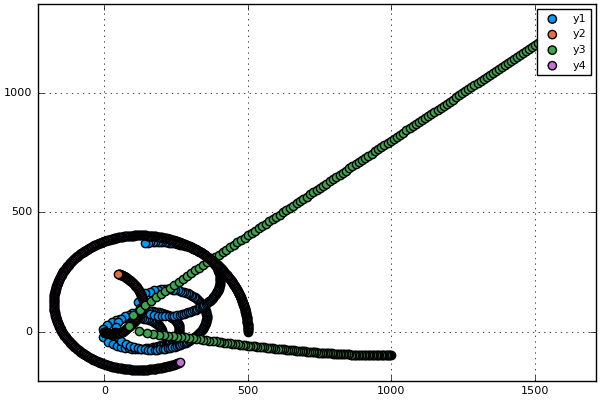

In [68]:
G = 50
star1 = Star(1, 3, [200, 0], [0, 2], [0, 0])
star2 = Star(2, 100, [0, 0], [0, -0.2], [0, 0])
star3 = Star(3, 0.1, [1000, -100], [-2, 0], [0, 0])
star4 = Star(4, 20, [500, 0], [0, 3], [0, 0])
stars = [star1, star2, star3, star4]
logs = step!(stars, 0.01, 50000)
scatter(logs[:, 1, 1][2:150:end], logs[:, 1, 2][2:150:end])
scatter!(logs[:, 2, 1][2:400:end], logs[:, 2, 2][2:400:end])
scatter!(logs[:, 3, 1][2:200:end], logs[:, 3, 2][2:200:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


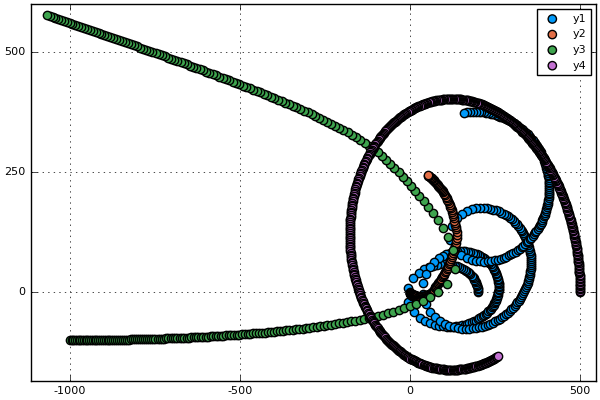

In [73]:
G = 50
star1 = Star(1, 3, [200, 0], [0, 2], [0, 0])
star2 = Star(2, 100, [0, 0], [0, -0.2], [0, 0])
star3 = Star(3, 0.1, [-1000, -100], [2.5, 0], [0, 0])
star4 = Star(4, 20, [500, 0], [0, 3], [0, 0])
stars = [star1, star2, star3, star4]
logs = step!(stars, 0.01, 50000)
scatter(logs[:, 1, 1][2:150:end], logs[:, 1, 2][2:150:end])
scatter!(logs[:, 2, 1][2:400:end], logs[:, 2, 2][2:400:end])
scatter!(logs[:, 3, 1][2:200:end], logs[:, 3, 2][2:200:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


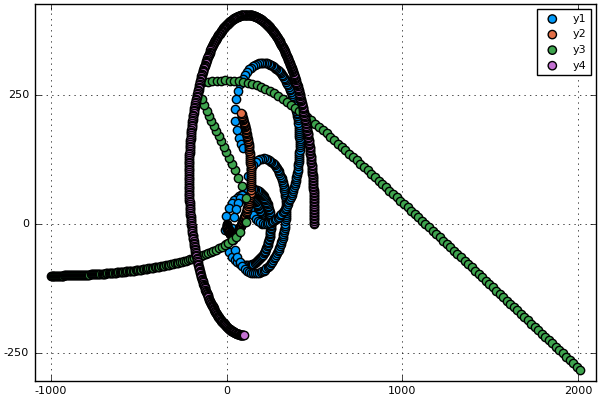

In [76]:
G = 50
star1 = Star(1, 3, [200, 0], [0, 2], [0, 0])
star2 = Star(2, 100, [0, 0], [0, -0.3], [0, 0])
star3 = Star(3, 0.1, [-1000, -100], [2.5, 0], [0, 0])
star4 = Star(4, 20, [500, 0], [0, 3], [0, 0])
stars = [star1, star2, star3, star4]
logs = step!(stars, 0.01, 50000)
scatter(logs[:, 1, 1][2:150:end], logs[:, 1, 2][2:150:end])
scatter!(logs[:, 2, 1][2:400:end], logs[:, 2, 2][2:400:end])
scatter!(logs[:, 3, 1][2:200:end], logs[:, 3, 2][2:200:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


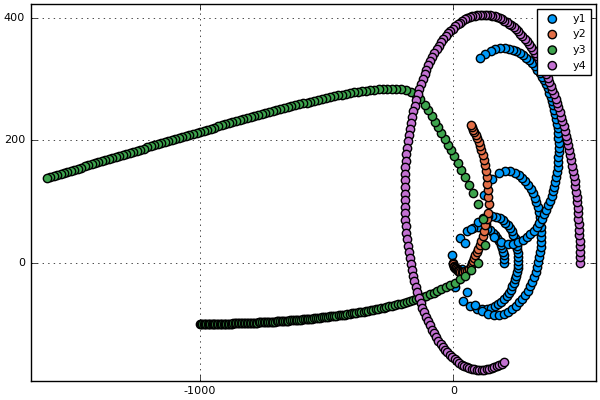

In [78]:
G = 50
star1 = Star(1, 3, [200, 0], [0, 2], [0, 0])
star2 = Star(2, 100, [0, 0], [0, -0.25], [0, 0])
star3 = Star(3, 0.1, [-1000, -100], [2.5, 0], [0, 0])
star4 = Star(4, 20, [500, 0], [0, 3], [0, 0])
stars = [star1, star2, star3, star4]
logs = step!(stars, 0.01, 50000)
scatter(logs[:, 1, 1][2:300:end], logs[:, 1, 2][2:300:end])
scatter!(logs[:, 2, 1][2:1000:end], logs[:, 2, 2][2:1000:end])
scatter!(logs[:, 3, 1][2:200:end], logs[:, 3, 2][2:200:end])
scatter!(logs[:, 4, 1][2:300:end], logs[:, 4, 2][2:300:end])


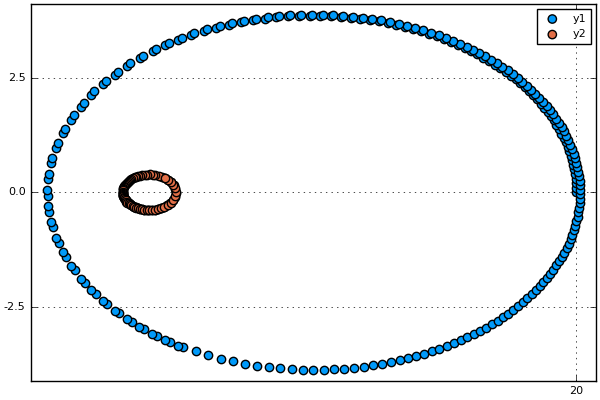

In [91]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0])
star2 = Star(2, 100, [12, 0], [0, -0.5], [0, 0])
stars = [star1, star2]
logs = step!(stars, 0.0001, 50000)
scatter(logs[:, 1, 1][1:200:end], logs[:, 1, 2][1:200:end])
scatter!(logs[:, 2, 1][1:500:end], logs[:, 2, 2][1:500:end])


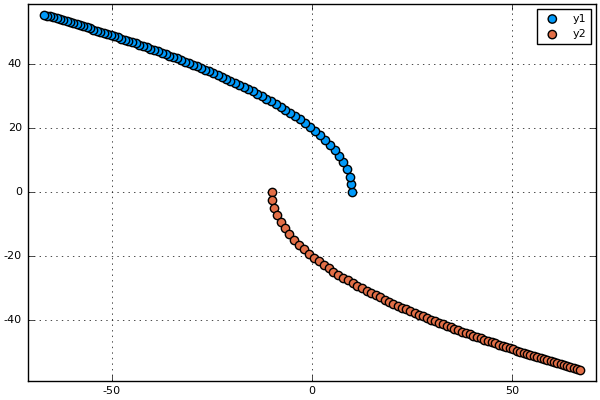

In [119]:
G = 50
star1 = Star(1, 10, [10, 0], [0, 5], [0, 0])
star2 = Star(2, 10, [-10, 0], [0, -5], [0, 0])
stars = [star1, star2]
logs = step!(stars, 0.001, 40000)
scatter(logs[:, 1, 1][1:500:end], logs[:, 1, 2][1:500:end])
scatter!(logs[:, 2, 1][1:500:end], logs[:, 2, 2][1:500:end])


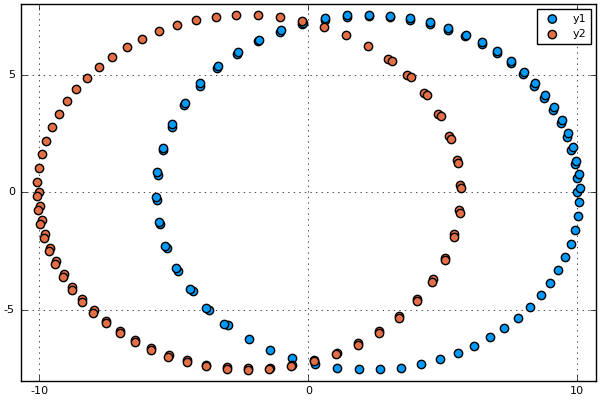

In [99]:
G = 50
star1 = Star(1, 10, [10, 0], [0, 3], [0, 0])
star2 = Star(2, 10, [-10, 0], [0, -3], [0, 0])
stars = [star1, star2]
logs = step!(stars, 0.001, 20000)
scatter(logs[:, 1, 1][1:200:end], logs[:, 1, 2][1:200:end])
scatter!(logs[:, 2, 1][1:200:end], logs[:, 2, 2][1:200:end])


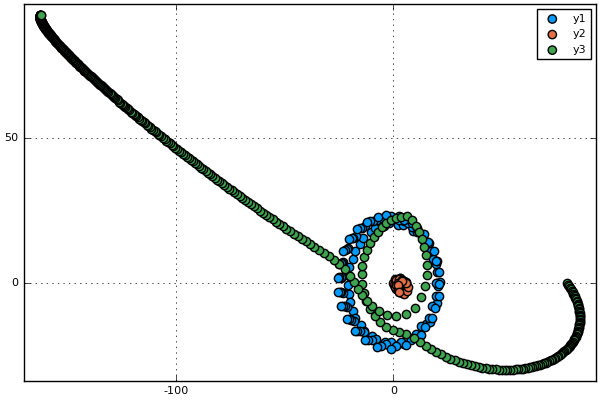

In [118]:
G = 5
star1 = Star(1, 10, [20, 0], [0, 5], [0, 0])
star2 = Star(2, 100, [0, 0], [0, -0.5], [0, 0])
star3 = Star(3, 0.5, [80, 0], [1, -1], [0, 0])
stars = [star1, star2, star3]
logs = step!(stars, 0.01, 20000)
scatter(logs[:, 1, 1][2:150:end], logs[:, 1, 2][2:150:end])
scatter!(logs[:, 2, 1][2:500:end], logs[:, 2, 2][2:500:end])
scatter!(logs[:, 3, 1][2:50:end], logs[:, 3, 2][2:50:end])


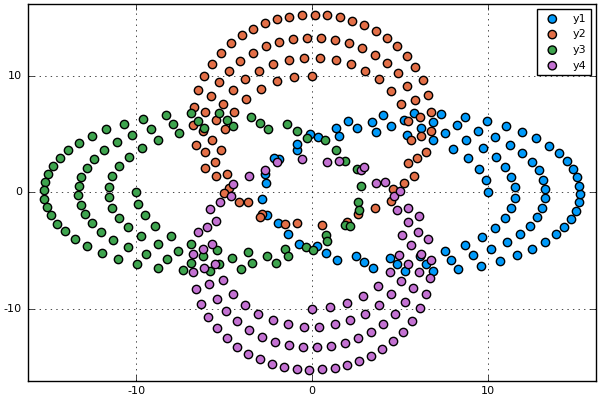

In [121]:
G = 5
star1 = Star(1, 5, [10, 0], [0, 1], [0, 0])
star2 = Star(2, 5, [0, 10], [-1, 0], [0, 0])
star3 = Star(3, 5, [-10, 0], [0, -1], [0, 0])
star4 = Star(4, 5, [0, -10], [1, 0], [0, 0])
stars = [star1, star2, star3, star4]
logs = step!(stars, 0.01, 10000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


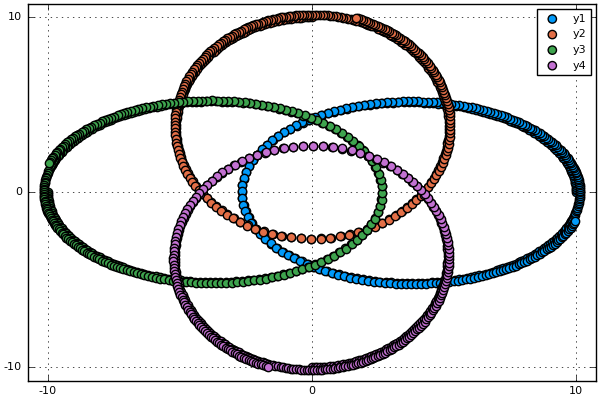

In [123]:
G = 5
star1 = Star(1, 5, [10, 0], [0, 1], [0, 0])
star2 = Star(2, 5, [0, 10], [-1, 0], [0, 0])
star3 = Star(3, 5, [-10, 0], [0, -1], [0, 0])
star4 = Star(4, 5, [0, -10], [1, 0], [0, 0])
stars = [star1, star2, star3, star4]
logs = step!(stars, 0.001, 40000)
scatter(logs[:, 1, 1][2:100:end], logs[:, 1, 2][2:100:end])
scatter!(logs[:, 2, 1][2:100:end], logs[:, 2, 2][2:100:end])
scatter!(logs[:, 3, 1][2:100:end], logs[:, 3, 2][2:100:end])
scatter!(logs[:, 4, 1][2:100:end], logs[:, 4, 2][2:100:end])


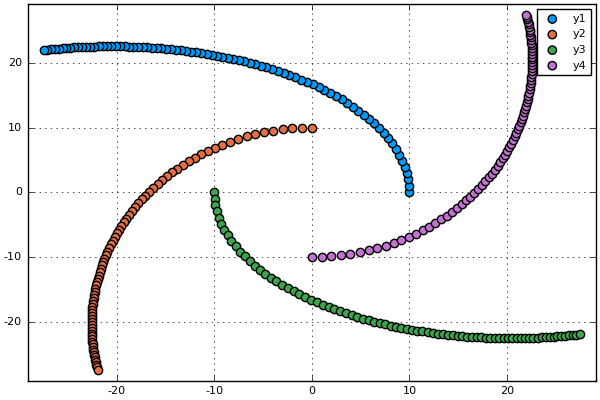

In [153]:
G = 5
star1 = Star(1, 5, [10, 0], [0, 2], [0, 0])
star2 = Star(2, 5, [0, 10], [-2, 0], [0, 0])
star3 = Star(3, 5, [-10, 0], [0, -2], [0, 0])
star4 = Star(4, 5, [0, -10], [2, 0], [0, 0])
stars = [star1, star2, star3, star4]
logs = step!(stars, 0.001, 40000)
scatter(logs[:, 1, 1][2:500:end], logs[:, 1, 2][2:500:end])
scatter!(logs[:, 2, 1][2:500:end], logs[:, 2, 2][2:500:end])
scatter!(logs[:, 3, 1][2:500:end], logs[:, 3, 2][2:500:end])
scatter!(logs[:, 4, 1][2:500:end], logs[:, 4, 2][2:500:end])


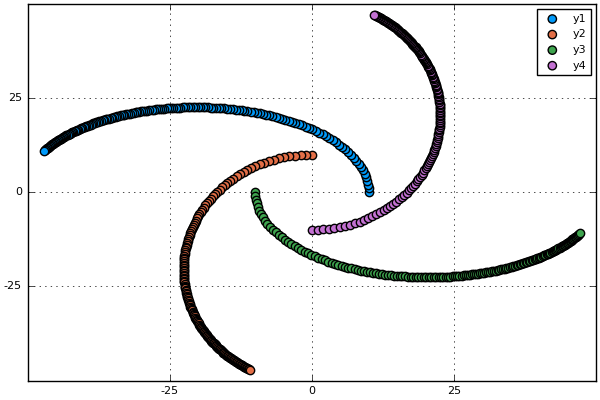

In [154]:
G = 5
star1 = Star(1, 5, [10, 0], [0, 2], [0, 0])
star2 = Star(2, 5, [0, 10], [-2, 0], [0, 0])
star3 = Star(3, 5, [-10, 0], [0, -2], [0, 0])
star4 = Star(4, 5, [0, -10], [2, 0], [0, 0])
stars = [star1, star2, star3, star4]
logs = step!(stars, 0.001, 80000)
scatter(logs[:, 1, 1][2:500:end], logs[:, 1, 2][2:500:end])
scatter!(logs[:, 2, 1][2:500:end], logs[:, 2, 2][2:500:end])
scatter!(logs[:, 3, 1][2:500:end], logs[:, 3, 2][2:500:end])
scatter!(logs[:, 4, 1][2:500:end], logs[:, 4, 2][2:500:end])


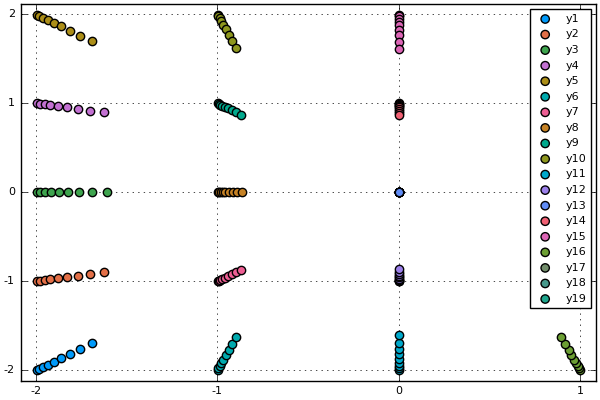

In [166]:
G = 5
m_ranges, n_ranges = -2:1:2, -2:1:2
stars = Array(Star, length(m_ranges) * length(n_ranges))
c = 1
for i in m_ranges
    for j in n_ranges
        stars[c] = Star(c, 5, [i, j], [0, 0], [0, 0])
        c += 1
    end
end
logs = step!(stars, 0.01, 10)
scatter(logs[:, 1, 1][2:1:end], logs[:, 1, 2][2:1:end])
scatter!(logs[:, 2, 1][2:1:end], logs[:, 2, 2][2:1:end])
scatter!(logs[:, 3, 1][2:1:end], logs[:, 3, 2][2:1:end])
scatter!(logs[:, 4, 1][2:1:end], logs[:, 4, 2][2:1:end])
scatter!(logs[:, 5, 1][2:1:end], logs[:, 5, 2][2:1:end])
scatter!(logs[:, 6, 1][2:1:end], logs[:, 6, 2][2:1:end])
scatter!(logs[:, 7, 1][2:1:end], logs[:, 7, 2][2:1:end])
scatter!(logs[:, 8, 1][2:1:end], logs[:, 8, 2][2:1:end])
scatter!(logs[:, 9, 1][2:1:end], logs[:, 9, 2][2:1:end])
scatter!(logs[:, 10, 1][2:1:end], logs[:, 10, 2][2:1:end])
scatter!(logs[:, 11, 1][2:1:end], logs[:, 11, 2][2:1:end])
scatter!(logs[:, 12, 1][2:1:end], logs[:, 12, 2][2:1:end])
scatter!(logs[:, 13, 1][2:1:end], logs[:, 13, 2][2:1:end])
scatter!(logs[:, 14, 1][2:1:end], logs[:, 14, 2][2:1:end])
scatter!(logs[:, 15, 1][2:1:end], logs[:, 15, 2][2:1:end])
scatter!(logs[:, 16, 1][2:1:end], logs[:, 16, 2][2:1:end])
scatter!(logs[:, 17, 1][2:1:end], logs[:, 17, 2][2:1:end])
scatter!(logs[:, 18, 1][2:1:end], logs[:, 18, 2][2:1:end])
scatter!(logs[:, 19, 1][2:1:end], logs[:, 19, 2][2:1:end])



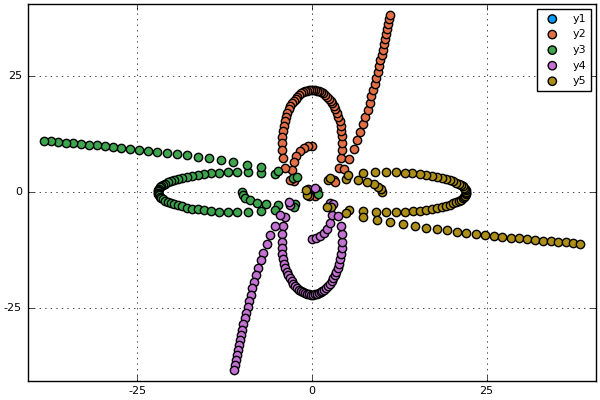

In [172]:
G = 5
star1 = Star(1, 50, [0, 0], [0, 0], [0, 0])
star2 = Star(2, 5, [0, 10], [-2, 0], [0, 0])
star3 = Star(3, 5, [-10, 0], [0, -2], [0, 0])
star4 = Star(4, 5, [0, -10], [2, 0], [0, 0])
star5 = Star(5, 5, [10, 0], [0, 2], [0, 0])
stars = [star1, star2, star3, star4, star5]
logs = step!(stars, 0.001, 25000)
scatter(logs[:, 1, 1][2:500:end], logs[:, 1, 2][2:500:end])
scatter!(logs[:, 2, 1][2:300:end], logs[:, 2, 2][2:300:end])
scatter!(logs[:, 3, 1][2:300:end], logs[:, 3, 2][2:300:end])
scatter!(logs[:, 4, 1][2:300:end], logs[:, 4, 2][2:300:end])
scatter!(logs[:, 5, 1][2:300:end], logs[:, 5, 2][2:300:end])


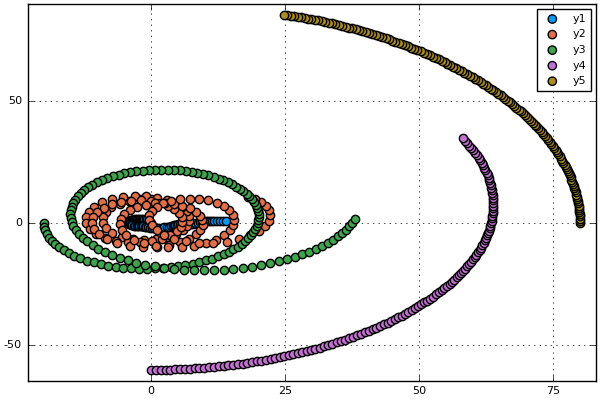

In [191]:
G = 5
star1 = Star(1, 100, [0, 0], [-0.2, 0.4], [0, 0])
star2 = Star(2, 3, [0, 10], [-7, 0], [0, 0])
star3 = Star(3, 5, [-20, 0], [0, -5], [0, 0])
star4 = Star(4, 20, [0, -60], [3, 0], [0, 0])
star5 = Star(5, 40, [80, 0], [0, 3], [0, 0])
stars = [star1, star2, star3, star4, star5]
logs = step!(stars, 0.001, 40000)
scatter(logs[:, 1, 1][2:500:end], logs[:, 1, 2][2:500:end])
scatter!(logs[:, 2, 1][2:300:end], logs[:, 2, 2][2:300:end])
scatter!(logs[:, 3, 1][2:300:end], logs[:, 3, 2][2:300:end])
scatter!(logs[:, 4, 1][2:300:end], logs[:, 4, 2][2:300:end])
scatter!(logs[:, 5, 1][2:300:end], logs[:, 5, 2][2:300:end])


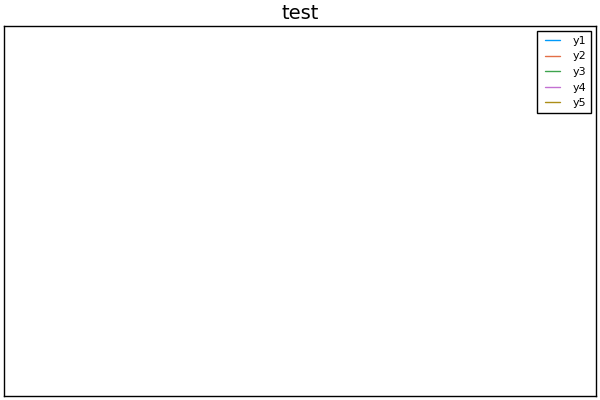

In [199]:
plt = plot(5, title="test")

In [200]:
@gif for i in 1:10
    push!(plt, i)#, 2*i, 3*i, i^2, i^0.5)
end

INFO: Saved animation to /Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif


Plots.AnimatedGif("/Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif")

In [206]:
@gif for i in 1:10
    push!(plt,[i, 3*i, 5+i])#, 2*i, 3*i, i^2, i^0.5)
end

INFO: Saved animation to /Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif


Plots.AnimatedGif("/Users/neon/Desktop/S/repositories/Mn/Julia/Untitled Folder 4/tmp.gif")